In [ ]:
#pip install missingno
# !pip install scikit-learn
# pip install numpy as np

In [2]:
# Import data
import pandas as pd

raw_df = pd.read_csv(r"C:\Users\Velpr\Documents\Energy\individual+household+electric+power+consumption\household_power_consumption.txt", delimiter="\t")

#show 1st 5 rows,,,information of data,,,whether not null,,,duplicated or not with count)
# print(raw_df.head())
# print(raw_df.info())
print(raw_df.isnull().sum())
# print(raw_df.duplicated().sum())

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3    0
dtype: int64


In [3]:

#gives the summary of numerical cols
print(raw_df.describe())

       Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
count                                             2075259                                                                       
unique                                            2075259                                                                       
top     26/11/2010;21:02:00;0.932;0.000;239.550;3.800;...                                                                       
freq                                                    1                                                                       


In [4]:
rawCSV_df = pd.read_csv(r"C:\Users\Velpr\Documents\Energy\individual+household+electric+power+consumption\household_power_consumption.txt", delimiter=";")
#print(rawCSV_df)
rawCSV_df.to_csv(r"C:\Users\Velpr\Documents\Energy\file\rawCSV.csv", index=False)
print(rawCSV_df.isnull().sum())
print(rawCSV_df.info())


C:\Users\Velpr\AppData\Local\Temp\ipykernel_16572\2972130429.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  rawCSV_df = pd.read_csv(r"C:\Users\Velpr\Documents\Energy\individual+household+electric+power+consumption\household_power_consumption.txt", delimiter=";")


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [5]:
category_col = rawCSV_df.select_dtypes(include=["object"])
print("category column:\n", category_col.head())

numerical_col = rawCSV_df.select_dtypes(include=["int64","float64"])
print("numerical column:\n", numerical_col.head())

category column:
          Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  
0           18.400          0.000          1.000  
1           23.000          0.000          1.000  
2           23.000          0.000          2.000  
3           23.000          0.000          1.000  
4           15.800          0.000          1.000  
numerical column:
    Sub_metering_3
0            17.0
1            16.0
2            17.0
3            17.0
4            17.0


In [ ]:
# Handle category and numerical column
import numpy as np

#To join date & time and Drop original columns
rawCSV_df["datetime"] = pd.to_datetime(rawCSV_df["Date"] + " " + rawCSV_df["Time"])
rawCSV_df.drop(["Date", "Time"], axis=1, inplace=True)

# Replacing '?' with NaN
rawCSV_df.replace("?", np.nan, inplace=True)


C:\Users\Velpr\AppData\Local\Temp\ipykernel_16572\2003828441.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rawCSV_df["datetime"] = pd.to_datetime(rawCSV_df["Date"] + " " + rawCSV_df["Time"])


In [9]:
print(rawCSV_df.head())


  Global_active_power Global_reactive_power  Voltage Global_intensity  \
0               4.216                 0.418  234.840           18.400   
1               5.360                 0.436  233.630           23.000   
2               5.374                 0.498  233.290           23.000   
3               5.388                 0.502  233.740           23.000   
4               3.666                 0.528  235.680           15.800   

  Sub_metering_1 Sub_metering_2  Sub_metering_3            datetime  
0          0.000          1.000            17.0 2006-12-16 17:24:00  
1          0.000          1.000            16.0 2006-12-16 17:25:00  
2          0.000          2.000            17.0 2006-12-16 17:26:00  
3          0.000          1.000            17.0 2006-12-16 17:27:00  
4          0.000          1.000            17.0 2006-12-16 17:28:00  


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64


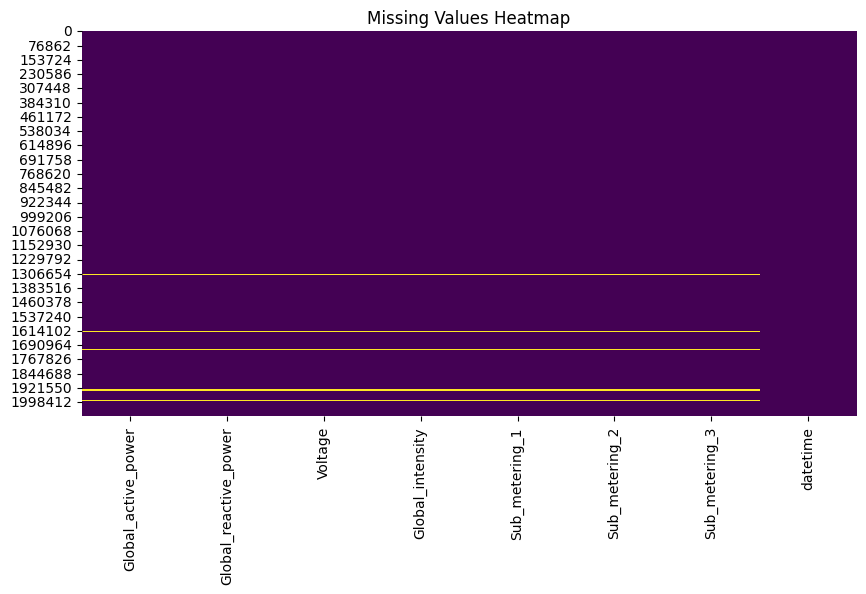

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# To check and visualize missing values

print(rawCSV_df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.heatmap(rawCSV_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



In [11]:
#To understand skewness, peaks

rawCSV_df.describe()


,Sub_metering_3,datetime
count,2.049280e+06,2075259
mean,6.458447e+00,2008-12-06 07:12:59.999994112
min,0.000000e+00,2006-12-16 17:24:00
25%,0.000000e+00,2007-12-12 00:18:30
50%,1.000000e+00,2008-12-06 07:13:00
75%,1.700000e+01,2009-12-01 14:07:30
max,3.100000e+01,2010-11-26 21:02:00
std,8.437154e+00,NaN


In [12]:
# convert to numeric values

rawCSV_df = rawCSV_df.apply(pd.to_numeric, errors='coerce')  # Removes `inplace`
rawCSV_df["datetime"] = pd.to_datetime(rawCSV_df["datetime"])
print(rawCSV_df.dtypes)



Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object


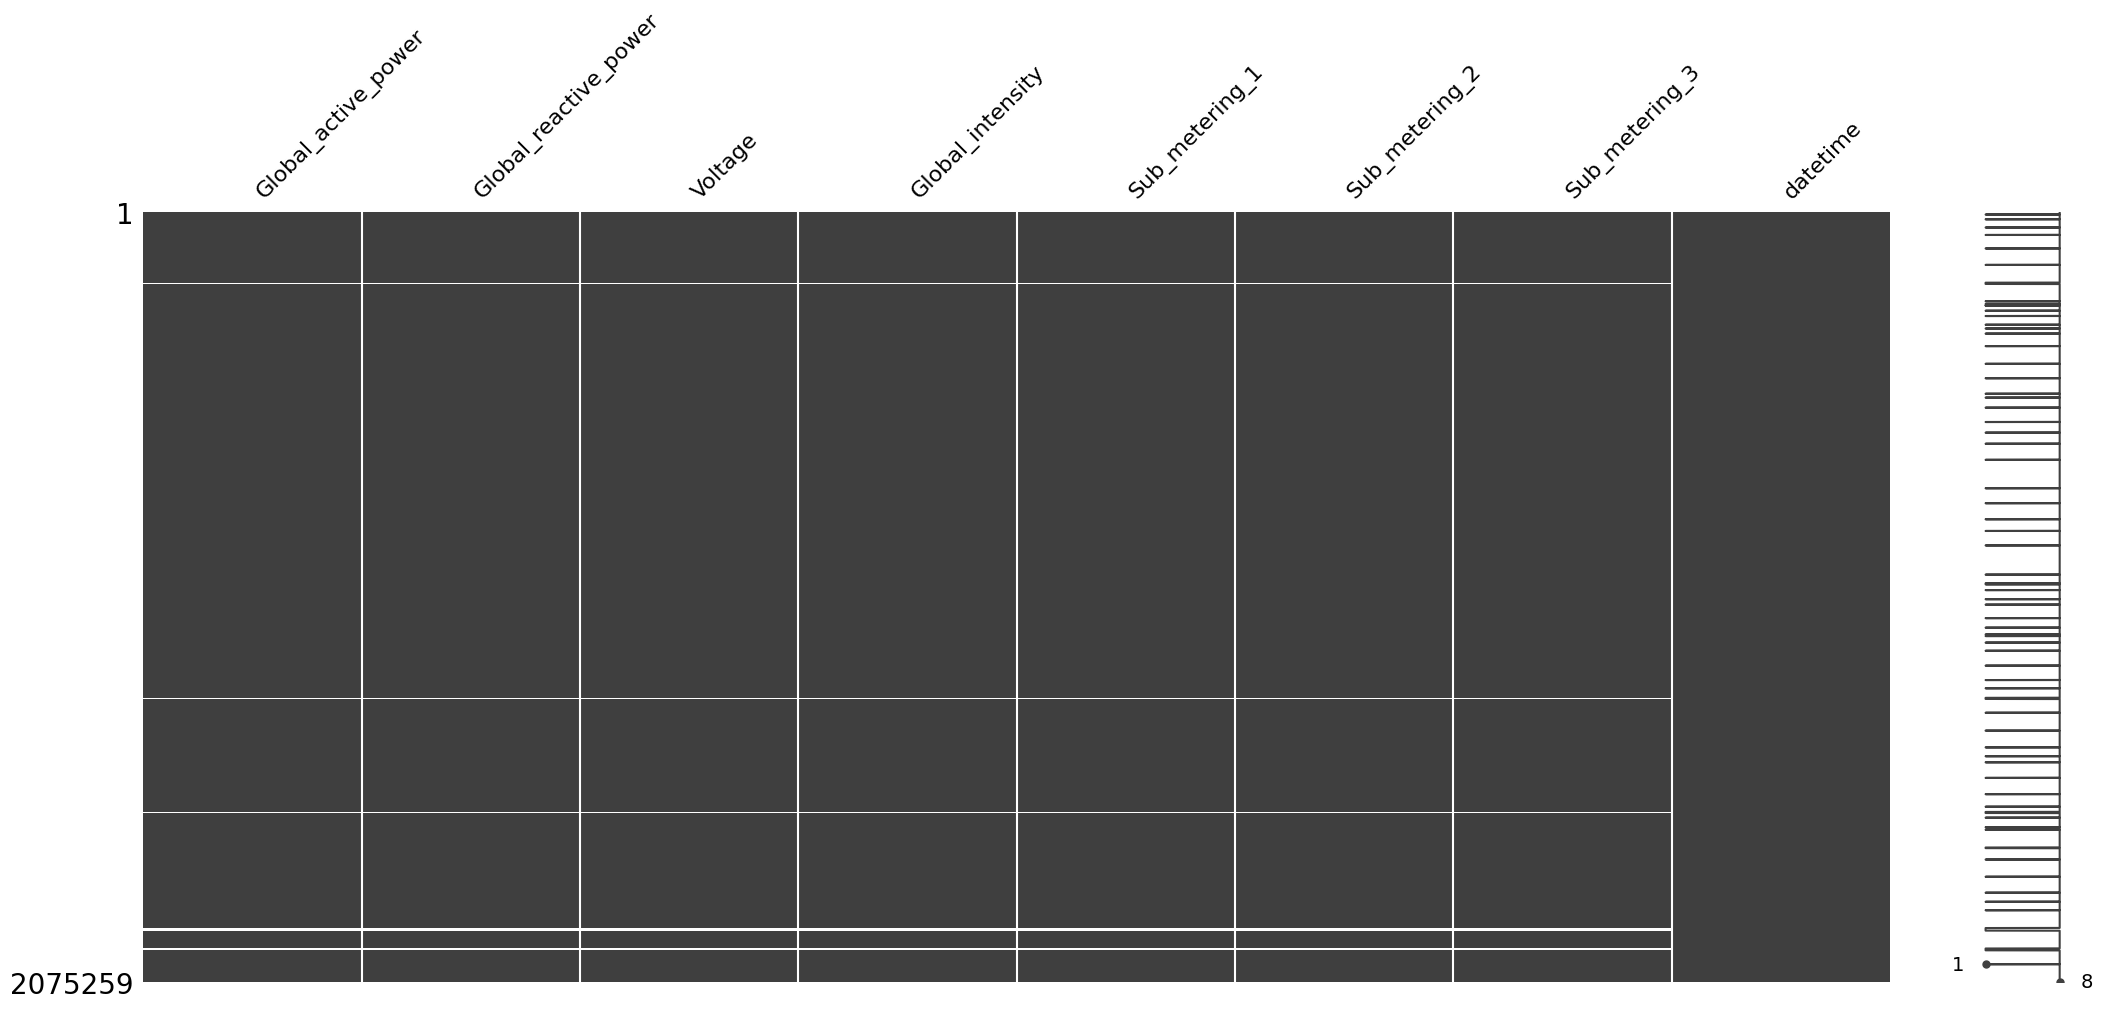

In [13]:
# Visualizing Missing Data

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(rawCSV_df)
plt.show()



In [14]:
# filling nan values with mean

numeric_df = rawCSV_df.select_dtypes(include=['number'])
rawCSV_df.fillna(numeric_df.mean(), inplace=True)

rawCSV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


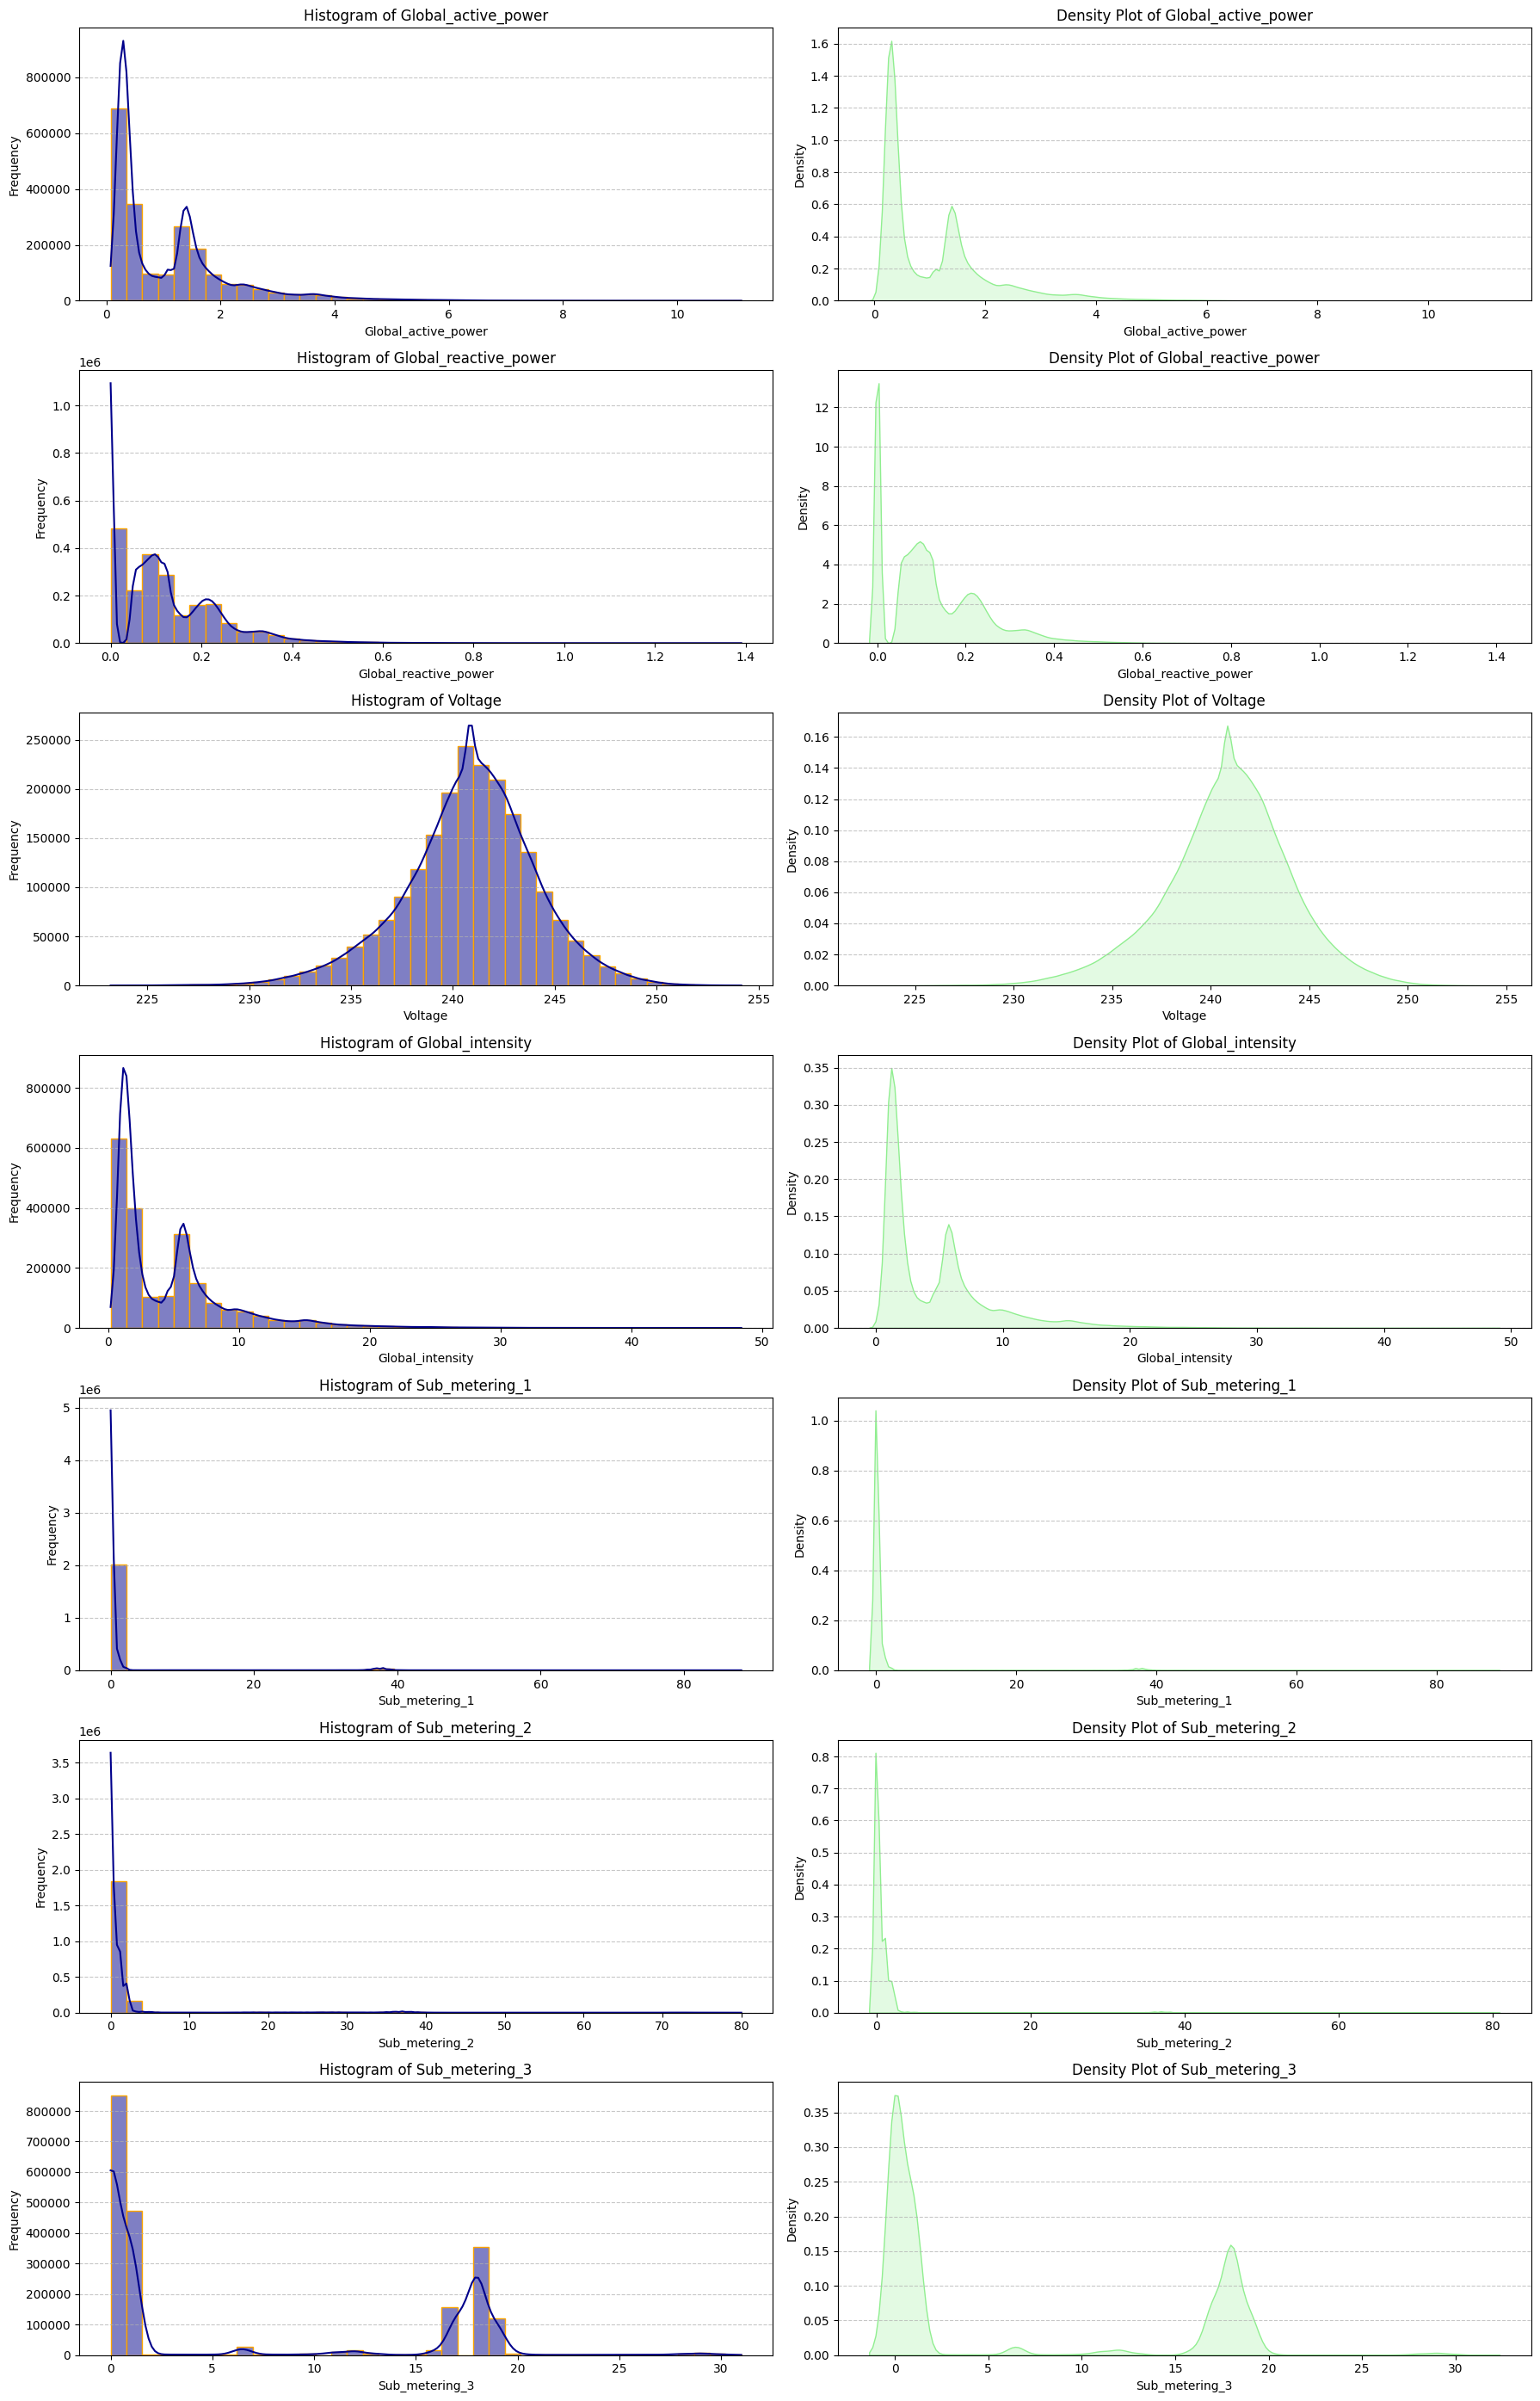

In [ ]:
#Store numeric columns in numeric_cols for distribution analysis

numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(18, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    # Histogram (left column)
    sns.histplot(rawCSV_df[col].dropna(), bins=40, kde=True, color='darkblue', edgecolor='orange', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=12)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # KDE plot (right column)
    sns.kdeplot(rawCSV_df[col].dropna(), fill=True, color='lightgreen', ax=axes[i, 1])
    axes[i, 1].set_title(f'Density Plot of {col}', fontsize=12)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

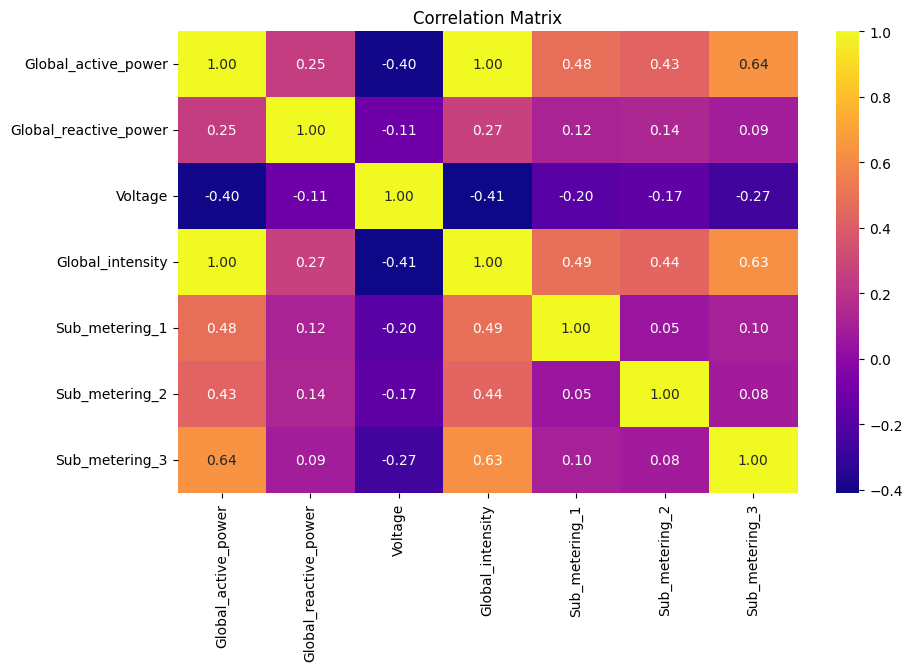

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define continuous columns
conti_col = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

# Computing correlation matrix using heatmap
corr_matrix = rawCSV_df[conti_col].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [18]:
# Date and time convertion
rawCSV_df['year'] = rawCSV_df['datetime'].dt.year
rawCSV_df['month'] = rawCSV_df['datetime'].dt.month
rawCSV_df['hour'] = rawCSV_df['datetime'].dt.hour
rawCSV_df['day_of_week'] = rawCSV_df['datetime'].dt.dayofweek
rawCSV_df['weekday'] = rawCSV_df['day_of_week']  < 5

rawCSV_df['weekend'] = rawCSV_df['day_of_week']  >4

rawCSV_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,year,month,hour,day_of_week,weekday,weekend
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,17,5,False,True
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,17,5,False,True
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,17,5,False,True
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,17,5,False,True
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,17,5,False,True


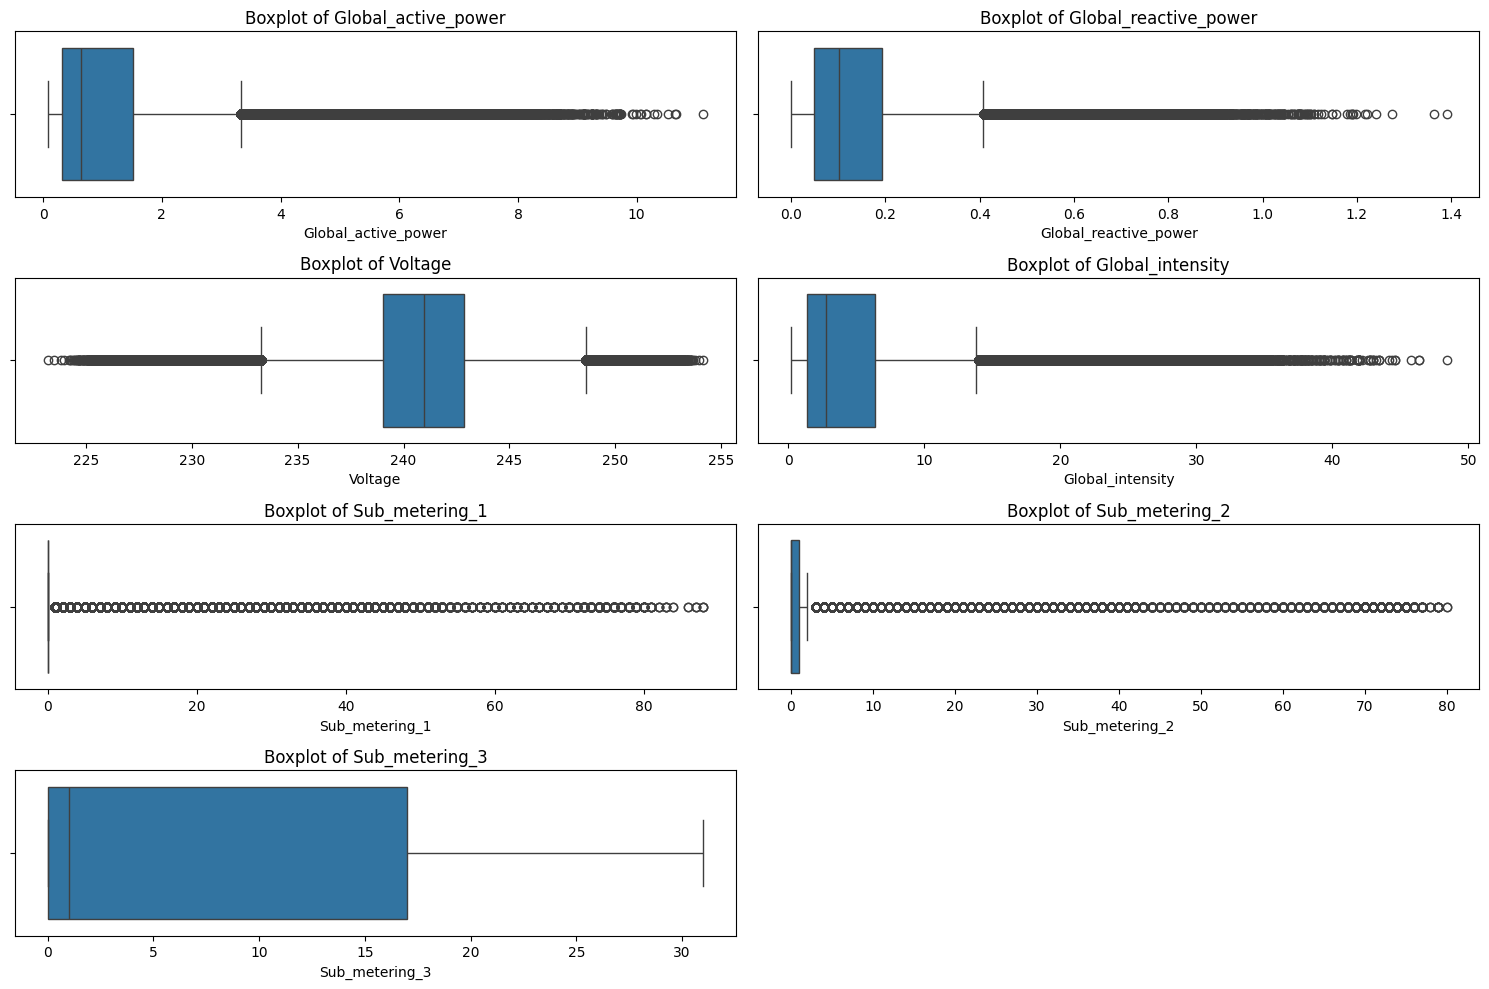

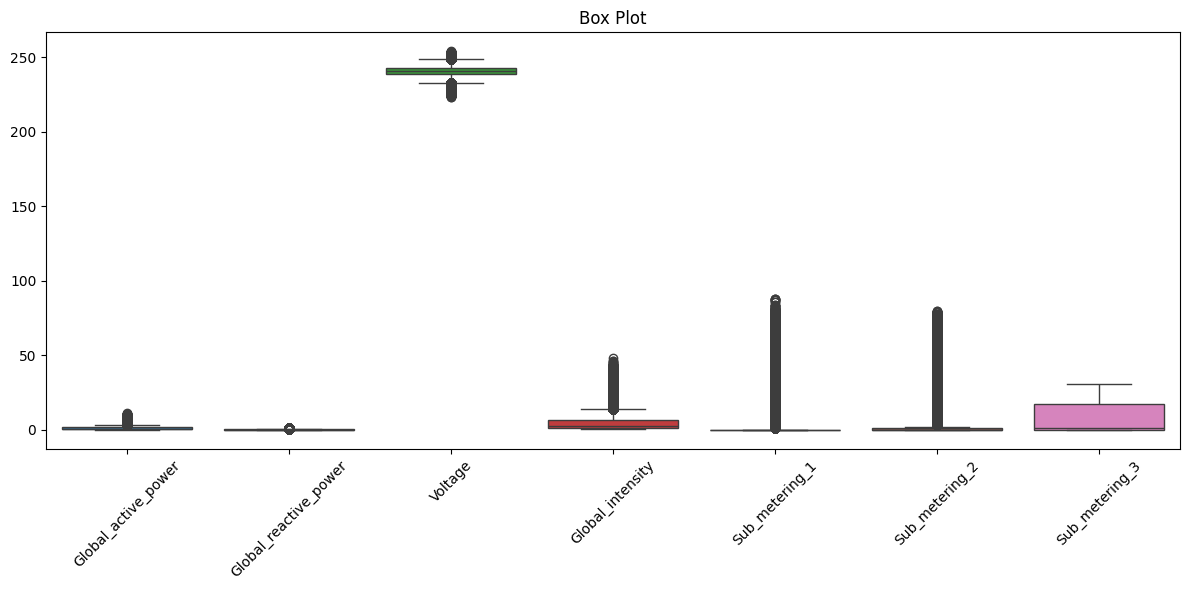

In [ ]:
# Outlier detection using boxplot

#fig, axes = plt.Subplot(nrows=4, ncols=2, figsize=(12, 6) )
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    
    # sns.boxplot(x=rawCSV_df[col])
    # plt.show()
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=rawCSV_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [20]:
# Calculating outliers

import numpy as np

Q1 = rawCSV_df['Global_active_power'].quantile(0.25)
Q3 = rawCSV_df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Outliers threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = rawCSV_df[(rawCSV_df['Global_active_power'] < lower_bound) | (rawCSV_df['Global_active_power'] > upper_bound)]
print(outliers.count())

Global_active_power      96742
Global_reactive_power    96742
Voltage                  96742
Global_intensity         96742
Sub_metering_1           96742
Sub_metering_2           96742
Sub_metering_3           96742
datetime                 96742
year                     96742
month                    96742
hour                     96742
day_of_week              96742
weekday                  96742
weekend                  96742
dtype: int64


c:\Users\Velpr\Documents\Energy\file\energy.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


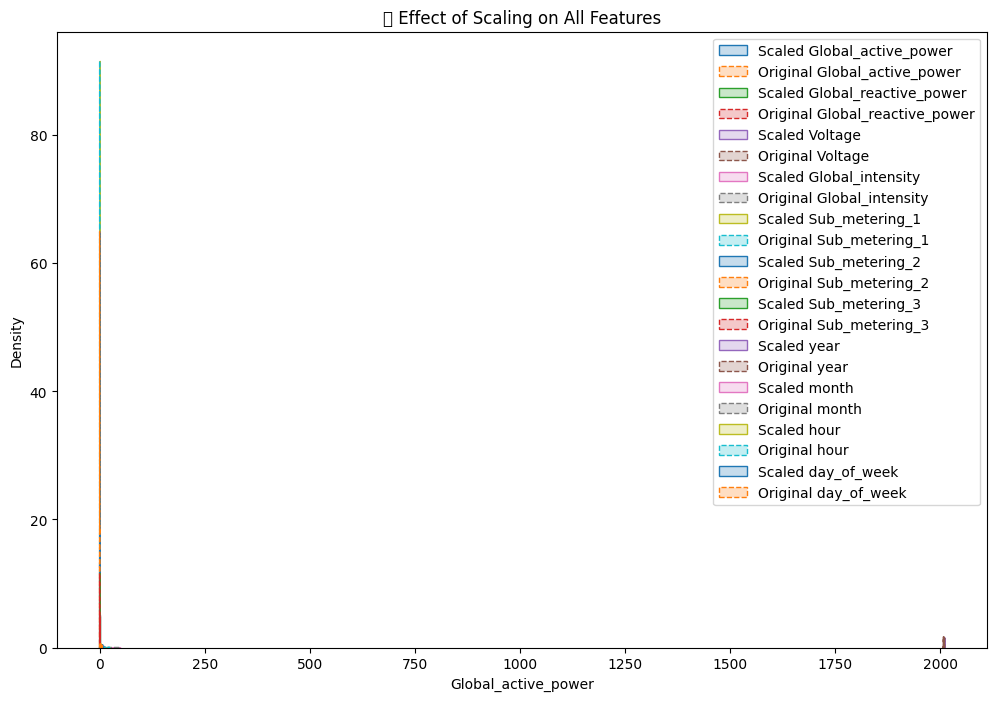

In [ ]:
# For Scaling & Normalization (Reduce Outlier Influence)
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# rawCSV_df[['Global_active_power']] = scaler.fit_transform(rawCSV_df[['Global_active_power']])

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
rawCSV_df[scaled_features] = scaler.fit_transform(rawCSV_df[scaled_features])

# Visualize with KDE
numeric_cols = rawCSV_df.select_dtypes(include=['float64', 'int32']).columns  # Selecting numeric columns

plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(rawCSV_df[col], fill=True, label=f"Scaled {col}")
    sns.kdeplot(rawCSV_df[col], fill=True, linestyle='dashed', label=f"Original {col}")
    
plt.legend()
plt.title("📊 Effect of Scaling on All Features")
plt.show()
###########


C:\Users\Velpr\AppData\Local\Temp\ipykernel_16572\1508572521.py:2: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  scaled_data = (rawCSV_df - rawCSV_df.mean()) / rawCSV_df.std()


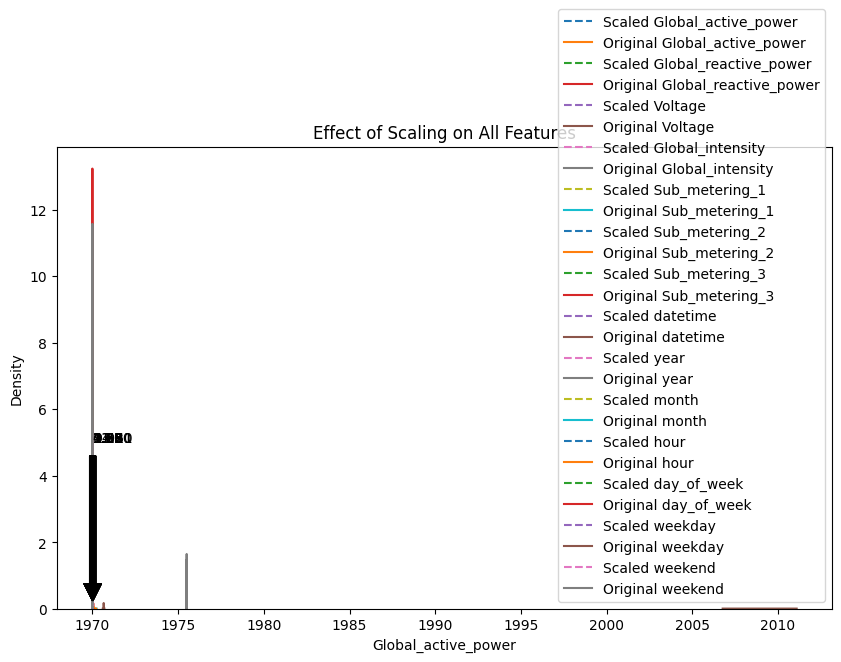

In [21]:

# Normalize data
scaled_data = (rawCSV_df - rawCSV_df.mean()) / rawCSV_df.std()

# Plot density curves
plt.figure(figsize=(10, 6))
for column in scaled_data.columns:
    sns.kdeplot(scaled_data[column], label=f'Scaled {column}', linestyle='dashed')
    sns.kdeplot(rawCSV_df[column], label=f'Original {column}')

# Annotate max density points
for column in scaled_data.columns:
    max_density = scaled_data[column].max()
    plt.annotate(f'{max_density:.2f}', xy=(max_density, 0), xytext=(max_density, 5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Effect of Scaling on All Features')
plt.xlabel('Global_active_power')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

c:\Users\Velpr\Documents\Energy\file\energy.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


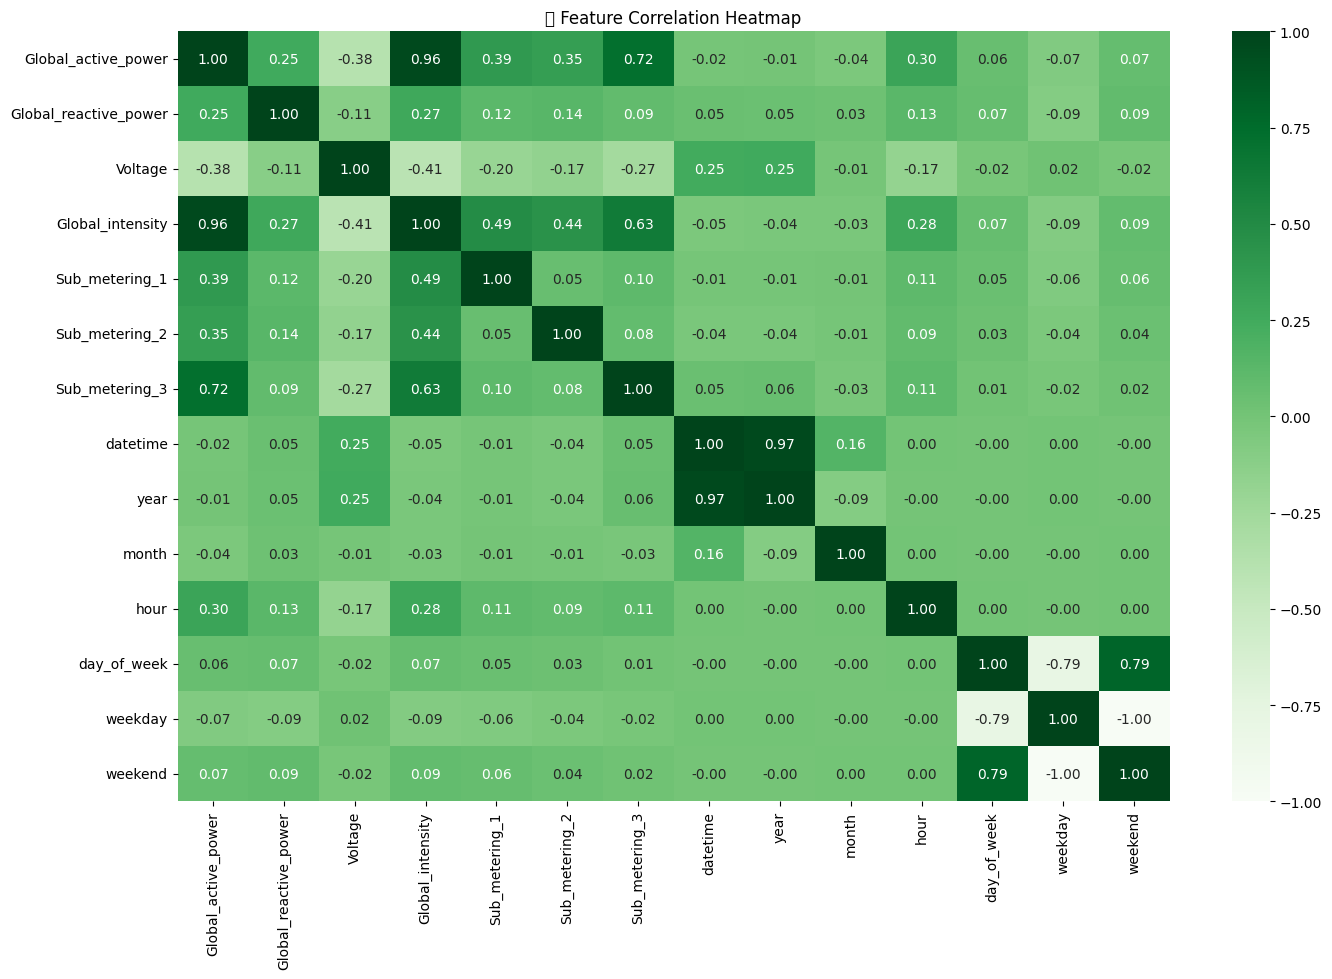

In [ ]:
# Applying Log Transformation to Reduce Skewness
import numpy as np

rawCSV_df['Global_active_power'] = np.log1p(rawCSV_df['Global_active_power'])  
rawCSV_df['Voltage'] = np.log1p(rawCSV_df['Voltage'])

# Using interpolation to fill missing or extreme outlier values
rawCSV_df['Global_active_power'] = rawCSV_df['Global_active_power'].interpolate(method='linear')
rawCSV_df['Voltage'] = rawCSV_df['Voltage'].interpolate(method='polynomial', order=2)  

# To Check Feature Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for those columns
corr_matrix = rawCSV_df[numeric_cols].corr()

plt.figure(figsize=(16,10))
sns.heatmap(rawCSV_df.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title("🔎 Feature Correlation Heatmap")
plt.show()
    
    


In [ ]:
# Control outliers

import numpy as np

from scipy.stats.mstats import winsorize
rawCSV_df['Global_active_power'] = winsorize(rawCSV_df['Global_active_power'], limits=[0.01, 0.01])  # Trims 1% from both tails

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
rawCSV_df[['Global_active_power', 'Voltage']] = scaler.fit_transform(rawCSV_df[['Global_active_power', 'Voltage']])

# Verify outliers

Q1 = rawCSV_df['Global_active_power'].quantile(0.25)
Q3 = rawCSV_df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Outliers threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = rawCSV_df[(rawCSV_df['Global_active_power'] < lower_bound) | (rawCSV_df['Global_active_power'] > upper_bound)]
print(outliers.count())


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
year                     0
month                    0
hour                     0
day_of_week              0
weekday                  0
weekend                  0
dtype: int64


In [ ]:
# DATA PREPROCESSING
# Creating additional features such as daily averages, peak hours, or rolling averages.
rawCSV_df['daily_avg_power'] = rawCSV_df.groupby('day_of_week')['Global_active_power'].transform('mean')

rawCSV_df['peak_hour_power'] = rawCSV_df.groupby('hour')['Global_active_power'].transform('max')

rawCSV_df['rolling_avg_3'] = rawCSV_df['Global_active_power'].rolling(window=3).mean()  
rawCSV_df['rolling_avg_7'] = rawCSV_df['Global_active_power'].rolling(window=7).mean() 

# Track changes in energy consumption across hours
rawCSV_df['hourly_change'] = rawCSV_df['Global_active_power'].diff()

# Combine Time-Based Features for Model Input
rawCSV_df['time_weighted_power'] = rawCSV_df['Global_active_power'] * (rawCSV_df['hour'] + 1)  
rawCSV_df['weekend_flag'] = rawCSV_df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)  


In [ ]:
 # Check missing values per column
print(rawCSV_df.isna().sum()) 

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
year                     0
month                    0
hour                     0
day_of_week              0
weekday                  0
weekend                  0
daily_avg_power          0
peak_hour_power          0
rolling_avg_3            2
rolling_avg_7            6
hourly_change            1
time_weighted_power      0
weekend_flag             0
dtype: int64


C:\Users\Velpr\AppData\Local\Temp\ipykernel_16572\331541900.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="Spectral")
c:\Users\Velpr\Documents\Energy\file\energy.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


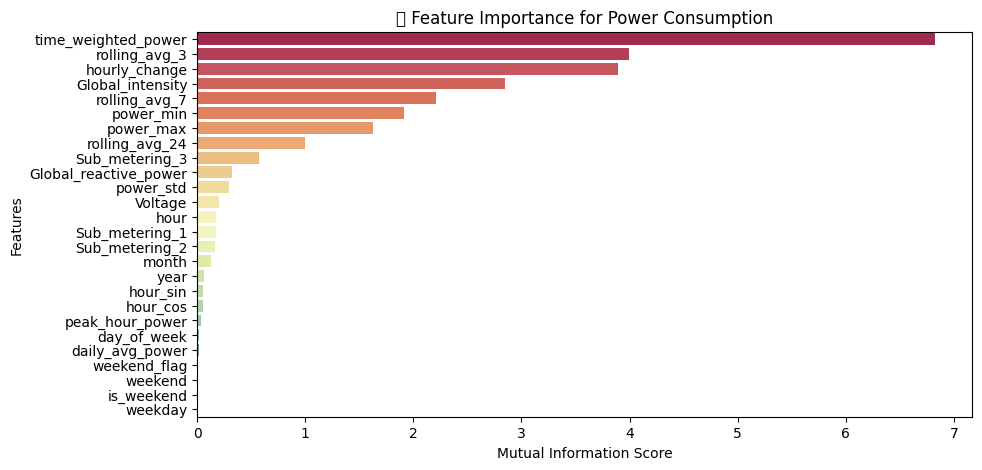

In [ ]:
# FEATURE ENGINEERING

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Extract Time-Based Features
rawCSV_df['hour_sin'] = np.sin(2 * np.pi * rawCSV_df['hour'] / 24)  
rawCSV_df['hour_cos'] = np.cos(2 * np.pi * rawCSV_df['hour'] / 24)
rawCSV_df['is_weekend'] = rawCSV_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  

# Compute Rolling & Aggregated Features
rawCSV_df['rolling_avg_3'] = rawCSV_df['Global_active_power'].rolling(window=3).mean()  
rawCSV_df['rolling_avg_24'] = rawCSV_df['Global_active_power'].rolling(window=24).mean()  
rawCSV_df['daily_avg_power'] = rawCSV_df.groupby('day_of_week')['Global_active_power'].transform('mean')

# Compute Statistical Features
rawCSV_df['power_std'] = rawCSV_df['Global_active_power'].rolling(window=24).std()  
rawCSV_df['power_min'] = rawCSV_df['Global_active_power'].rolling(window=24).min()  
rawCSV_df['power_max'] = rawCSV_df['Global_active_power'].rolling(window=24).max()  

# Normalize Key Features for ML Model Performance
scaler = MinMaxScaler()
scaled_features = ['Voltage', 'Global_active_power', 'rolling_avg_3', 'rolling_avg_24']
rawCSV_df[scaled_features] = scaler.fit_transform(rawCSV_df[scaled_features])

# Mutual Information Scores to rank feature importance:
X = rawCSV_df.drop(['Global_active_power'], axis=1)  
y = rawCSV_df['Global_active_power']

# Drop 'datetime' since it's not numerical
X = rawCSV_df.drop(['Global_active_power', 'datetime'], axis=1)  
y = rawCSV_df['Global_active_power']

# Handle missing values using median imputation (or change to interpolation if needed)
imputer = SimpleImputer(strategy="median")  
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
mi_scores = mutual_info_regression(X, y)
feature_importance = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="Spectral") 
plt.title("Feature Importance for Power Consumption")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

In [30]:
# MODEL SELECTION & TRAINING

#1)Split Dataset into Training & Testing Set
from sklearn.model_selection import train_test_split

X = rawCSV_df.drop(['Global_active_power'], axis=1)  # Features
y = rawCSV_df['Global_active_power']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#rawCSV_df = rawCSV_df.drop(columns=["datetime"], inplace=True)
#rawCSV_df.info()
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Align target variable
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print(X_train.isna().sum())

Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
year                     0
month                    0
hour                     0
day_of_week              0
weekday                  0
weekend                  0
daily_avg_power          0
peak_hour_power          0
rolling_avg_3            0
rolling_avg_7            0
hourly_change            0
time_weighted_power      0
weekend_flag             0
hour_sin                 0
hour_cos                 0
is_weekend               0
rolling_avg_24           0
power_std                0
power_min                0
power_max                0
dtype: int64


In [32]:
#print(X_train.dtypes)
X_train = X_train.select_dtypes(exclude=['datetime64'])

In [33]:
# 2) TRAIN Regrerssion Model

#)Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [ ]:
#)Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Optimize
ran_model = RandomForestRegressor(
    n_estimators=30,         # Reduced number of trees for speed
    max_depth=10,            # Limits tree depth to prevent unnecessary growth
    n_jobs=-1,               # Enables parallel processing using all available cores
    max_features=0.5,        # Limits feature selection per tree for efficiency
    warm_start=True,         # Allows incremental training when needed
    min_samples_split=5,     # Ensures reasonable node splitting to reduce complexity
    min_samples_leaf=4,      # Prevents overly small leaf nodes that slow training
    random_state=42          # Ensures reproducibility
)

# Train model
ran_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=30, n_jobs=-1,
                      random_state=42, warm_start=True)

In [36]:
#)Gradient Boosting (GBM)
from sklearn.ensemble import GradientBoostingRegressor
boost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
boost_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
#)Neural Network (MLP)
from sklearn.neural_network import MLPRegressor
neural_model = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500)
neural_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500)

In [ ]:
# #) Model Stacking by combining multiple models for better accuracy:
# from sklearn.ensemble import StackingRegressor

# estimators = [('RF', ran_model), ('GB', boost_model), ('SVR', svr_model)]
# stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
# stacked_model.fit(X_train, y_train)


In [41]:
X_test = X_test.drop(columns=['datetime'], errors='ignore')
print(X_train.columns)
print(X_test.columns)


Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'year', 'month',
       'hour', 'day_of_week', 'weekday', 'weekend', 'daily_avg_power',
       'peak_hour_power', 'rolling_avg_3', 'rolling_avg_7', 'hourly_change',
       'time_weighted_power', 'weekend_flag', 'hour_sin', 'hour_cos',
       'is_weekend', 'rolling_avg_24', 'power_std', 'power_min', 'power_max'],
      dtype='object')
Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'year', 'month',
       'hour', 'day_of_week', 'weekday', 'weekend', 'daily_avg_power',
       'peak_hour_power', 'rolling_avg_3', 'rolling_avg_7', 'hourly_change',
       'time_weighted_power', 'weekend_flag', 'hour_sin', 'hour_cos',
       'is_weekend', 'rolling_avg_24', 'power_std', 'power_min', 'power_max'],
      dtype='object')


Linear Regression: RMSE: 0.0152, MAE: 0.0074, R² Score: 0.9964
Random Forest: RMSE: 0.0062, MAE: 0.0036, R² Score: 0.9994
Gradient Boosting: RMSE: 0.0079, MAE: 0.0051, R² Score: 0.9990
Neural Network: RMSE: 0.0073, MAE: 0.0052, R² Score: 0.9992


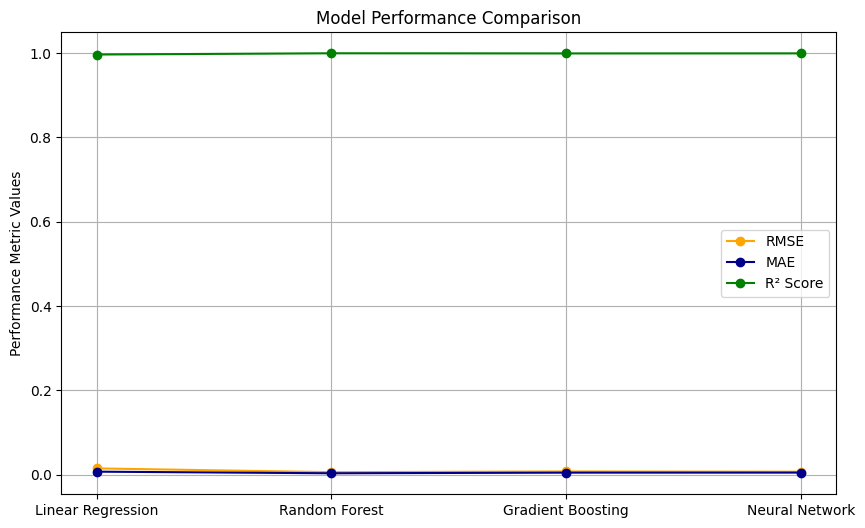

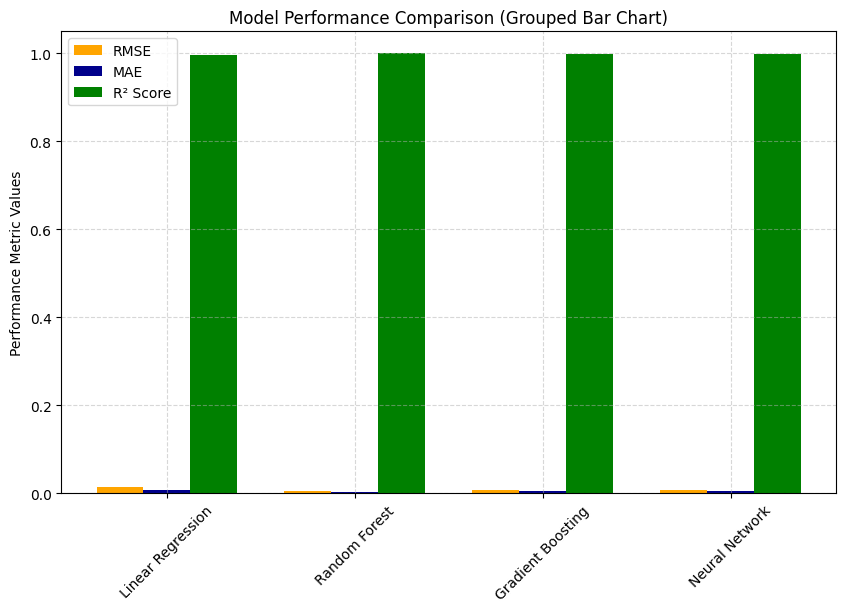

In [ ]:
 #  Model Performance EVALUATION

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Dictionary of models
models = {
    'Linear Regression': lr_model,
    'Random Forest': ran_model,
    'Gradient Boosting': boost_model,
    'Neural Network': neural_model
}
# Initialize lists to store metrics
model_names = []
rmse_values = []
mae_values = []
r2_values = []

# Model evaluation
for name, model in models.items():
    y_pred = model.predict(X_test)  

    #  Metrics
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    model_names.append(name)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"{name}: RMSE: {rmse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")

# Visualization 
plt.figure(figsize=(10, 6))

plt.plot(model_names, rmse_values, marker='o', linestyle='-', label="RMSE", color='orange')
plt.plot(model_names, mae_values, marker='o', linestyle='-', label="MAE", color='darkblue')
plt.plot(model_names, r2_values, marker='o', linestyle='-', label="R² Score", color='green')


plt.ylabel("Performance Metric Values")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)

plt.show()
############################

# X locations for bars
x = np.arange(len(models))
width = 0.25  

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, rmse_values, width, label='RMSE', color='orange')
ax.bar(x, mae_values, width, label='MAE', color='darkblue')
ax.bar(x + width, r2_values, width, label='R² Score', color='green')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel("Performance Metric Values")
ax.set_title("Model Performance Comparison (Grouped Bar Chart)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [45]:
# HYPERPARAMETER Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [2, 3, 5], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 5}
